In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [34]:
# Load dataset
file_path = r"D:\kaimtenx\week3\insurance-analytics-project\data\MachineLearningRating_v3.csv"
df = pd.read_csv(file_path)

# Preview data
print(df.shape)
print(df.columns)
df.head()

C:\Users\ayish\AppData\Local\Temp\ipykernel_1596\1027753769.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


(1000098, 52)
Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [35]:
# 1. Count and calculate % missing
missing_count = df.isnull().sum()
missing_pct = df.isnull().mean() * 100
# Combine into one DataFrame
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_pct
})
# Display sorted by highest missing %
print(" Missing Value Summary:\n")
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False))

 Missing Value Summary:

                         Missing Count   Missing %
NumberOfVehiclesInFleet        1000098  100.000000
CrossBorder                     999400   99.930207
CustomValueEstimate             779642   77.956560
WrittenOff                      641901   64.183810
Converted                       641901   64.183810
Rebuilt                         641901   64.183810
NewVehicle                      153295   15.327998
Bank                            145961   14.594670
AccountType                      40232    4.022806
Gender                            9536    0.953507
MaritalStatus                     8259    0.825819
mmcode                             552    0.055195
VehicleType                        552    0.055195
make                               552    0.055195
VehicleIntroDate                   552    0.055195
NumberOfDoors                      552    0.055195
bodytype                           552    0.055195
kilowatts                          552    0.055195
cubicc

In [36]:
# 2. Drop columns with >80% missing
cols_to_drop = missing_df[missing_df['Missing %'] > 80].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
print(f"\n Dropped columns with >80% missing:\n{cols_to_drop}")


 Dropped columns with >80% missing:
['CrossBorder', 'NumberOfVehiclesInFleet']


In [37]:
# Step 3: Impute remaining missing values
# - Use mean for numeric columns
# - Use mode for categorical columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
            print(f"Imputed numeric column '{col}' with median: {mean_value}")
        else:
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)
            print(f"Imputed categorical column '{col}' with mode: {mode_value}")

Imputed categorical column 'Bank' with mode: First National Bank
Imputed categorical column 'AccountType' with mode: Current account
Imputed categorical column 'MaritalStatus' with mode: Not specified
Imputed categorical column 'Gender' with mode: Not specified
Imputed numeric column 'mmcode' with median: 54877704.02047429
Imputed categorical column 'VehicleType' with mode: Passenger Vehicle
Imputed categorical column 'make' with mode: TOYOTA
Imputed categorical column 'Model' with mode: QUANTUM 2.7 SESFIKILE 16s
Imputed numeric column 'Cylinders' with median: 4.0466421755476985
Imputed numeric column 'cubiccapacity' with median: 2466.7432584393314
Imputed numeric column 'kilowatts' with median: 97.20791939540551
Imputed categorical column 'bodytype' with mode: B/S
Imputed numeric column 'NumberOfDoors' with median: 4.019249739381679
Imputed categorical column 'VehicleIntroDate' with mode: 4/2012
Imputed numeric column 'CustomValueEstimate' with median: 225531.1299417571
Imputed catego

In [38]:
# Step 1: Detect inf values in numeric columns
print(" Checking for inf/-inf values:")
is_inf = df.select_dtypes(include=[np.number]).applymap(np.isinf)
print(is_inf.sum())  # Count of inf values per column

# Step 2: Replace inf/-inf with NaN (across full DataFrame)
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3: Show remaining missing values (after replacement)
print("\n Missing values after inf-cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

 Checking for inf/-inf values:


C:\Users\ayish\AppData\Local\Temp\ipykernel_1596\3115858012.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  is_inf = df.select_dtypes(include=[np.number]).applymap(np.isinf)


UnderwrittenCoverID         0
PolicyID                    0
PostalCode                  0
mmcode                      0
RegistrationYear            0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
NumberOfDoors               0
CustomValueEstimate         0
SumInsured                  0
CalculatedPremiumPerTerm    0
TotalPremium                0
TotalClaims                 0
dtype: int64

 Missing values after inf-cleaning:
Series([], dtype: int64)


In [39]:
# Step 4: Impute any new NaNs caused by inf cleanup
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

print("\n Final check: All missing values should now be gone.")
print(df.isnull().sum().sum(), "missing values remaining.")


 Final check: All missing values should now be gone.
0 missing values remaining.


In [40]:
#check data types
print("\n Data types of each column:")
print(df.dtypes)
#size of the dataset
print("\n Size of the dataset:")
print(df.shape)



 Data types of each column:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object

In [41]:
#save data into "D:\kaimtenx\week3\insurance-analytics-project\data\MachineLearningRating_v3.csv"
output_file_path = r"D:\kaimtenx\week3\insurance-analytics-project\data\MachineLearningRating_v3_cleaned_task3.csv"
df.to_csv(output_file_path, index=False)
print(f"\n Cleaned data saved to: {output_file_path}")




 Cleaned data saved to: D:\kaimtenx\week3\insurance-analytics-project\data\MachineLearningRating_v3_cleaned_task3.csv


In [42]:
#load data
df = pd.read_csv(output_file_path)
# Display first few rows of the cleaned data
print("\n Cleaned data preview:")
print(df.head())

C:\Users\ayish\AppData\Local\Temp\ipykernel_1596\3285318830.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output_file_path)



 Cleaned data preview:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...

In [43]:
#Claim Frequency = (Number of Policies with Claims > 0) / (Total Policies)
# Create binary claim column
df['HasClaim'] = df['TotalClaims'] > 0
# Create contingency table
gender_table = pd.crosstab(df['Gender'], df['HasClaim'])
# Chi-square test
chi2, p, _, _ = chi2_contingency(gender_table)
print("P-Value:", p)
if p < 0.05:
    print("Reject H0: Gender impacts claim frequency")
else:
    print("Fail to reject H0: No gender difference in claims")

P-Value: 0.030320141820186792
Reject H0: Gender impacts claim frequency


In [44]:
from scipy.stats import f_oneway

In [45]:
#Claim Severity by Province (T-Test or ANOVA)

# Filter only policies with claims
claimed_df = df[df['TotalClaims'] > 0]

# Group claim severity by province
grouped = [group['TotalClaims'] for name, group in claimed_df.groupby('Province')]

# Run ANOVA
f_stat, p_val = f_oneway(*grouped)

print("P-Value:", p_val)
if p_val < 0.05:
    print("Reject H0: Province impacts claim severity")
else:
    print("Fail to reject H0: No difference across provinces")


P-Value: 6.304916760425176e-06
Reject H0: Province impacts claim severity


In [ ]:
#  Create Grouped Metrics
# Claim Frequency by Province
province_group = df.groupby('Province').agg(
    total_policies=('HasClaim', 'count'),
    claim_count=('HasClaim', 'sum'),
    avg_claim_amount=('TotalClaims', lambda x: x[x > 0].mean()),
    avg_margin=('Margin', 'mean')
)
province_group['claim_frequency'] = province_group['claim_count'] / province_group['total_policies']
province_group

,total_policies,claim_count,avg_claim_amount,avg_margin,claim_frequency
Province,,,,,
Eastern Cape,30336,50,27128.533277,25.833240,0.001648
Free State,8099,11,32265.661085,20.550805,0.001358
Gauteng,393865,1322,22243.878396,-13.558894,0.003356
KwaZulu-Natal,169781,483,29609.487473,-6.433598,0.002845
Limpopo,24836,67,15171.294187,20.971484,0.002698
Mpumalanga,52718,128,15979.553421,15.016059,0.002428
North West,143287,349,16963.467035,10.958832,0.002436
Northern Cape,6380,8,11186.313596,35.590527,0.001254
Western Cape,170796,370,28095.849881,-3.414689,0.002166


In [ ]:
#Define and Run A/B Test: 
#  Hypothesis 1: Risk Difference Across Provinces (use two provinces for A/B)
# Filter to two major provinces
group_a = df[df['Province'] == 'Gauteng']
group_b = df[df['Province'] == 'Western Cape']

# Compare claim frequency (binary variable): chi-square
contingency = pd.crosstab(df['Province'], df['HasClaim'])
chi2, p, _, _ = chi2_contingency(contingency)

print("Chi-Square Test for Claim Frequency by Province:")
print(f"Chi2 Statistic = {chi2:.2f}, p-value = {p:.4f}")

# Compare claim severity (only where claim > 0): t-test
severity_a = group_a[group_a['HasClaim'] == 1]['TotalClaims']
severity_b = group_b[group_b['HasClaim'] == 1]['TotalClaims']
t_stat, p_val = ttest_ind(severity_a, severity_b, equal_var=False)

print("\nT-Test for Claim Severity between Provinces:")
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


Chi-Square Test for Claim Frequency by Province:
Chi2 Statistic = 104.19, p-value = 0.0000

T-Test for Claim Severity between Provinces:
T-statistic = -2.17, p-value = 0.0306


In [52]:
#Hypothesis 2: Risk Difference Between Zip Codes
# Choose top 2 zip codes by frequency
top_zips = df['PostalCode'].value_counts().index[:2]
group_a = df[df['PostalCode'] == top_zips[0]]
group_b = df[df['PostalCode'] == top_zips[1]]

# Chi-square test on claim occurrence
contingency = pd.crosstab(df['PostalCode'].isin(top_zips), df['HasClaim'])
chi2, p, _, _ = chi2_contingency(contingency)

# t-test for claim severity
severity_a = group_a[group_a['HasClaim'] == 1]['TotalClaims']
severity_b = group_b[group_b['HasClaim'] == 1]['TotalClaims']
t_stat, p_val = ttest_ind(severity_a, severity_b, equal_var=False)
print("\nChi-Square Test for Claim Frequency by Zip Code:")
print(f"Chi2 Statistic = {chi2:.2f}, p-value = {p:.4f}")
print("\nT-Test for Claim Severity between Zip Codes:")
print(f"T-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")



Chi-Square Test for Claim Frequency by Zip Code:
Chi2 Statistic = 83.59, p-value = 0.0000

T-Test for Claim Severity between Zip Codes:
T-statistic = 0.39, p-value = 0.7002


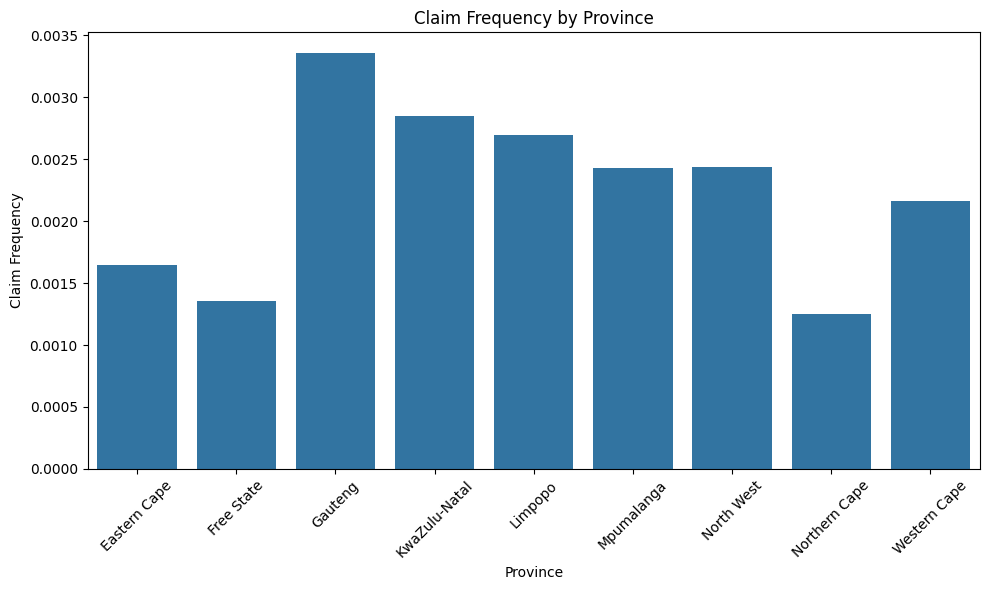

In [53]:
# Visualize Claim Frequency by Province
plt.figure(figsize=(10, 6))
sns.barplot(x=province_group.index, y='claim_frequency', data=province_group.reset_index())
plt.title('Claim Frequency by Province')
plt.xlabel('Province')
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Hypothesis 3: Margin Difference Between Zip Codes
margin_a = group_a['Margin']
margin_b = group_b['Margin']
t_stat, p_val = ttest_ind(margin_a, margin_b, equal_var=False)
print(f"T-test on Margin between zip codes: p = {p_val:.4f}")


T-test on Margin between zip codes: p = 0.2445


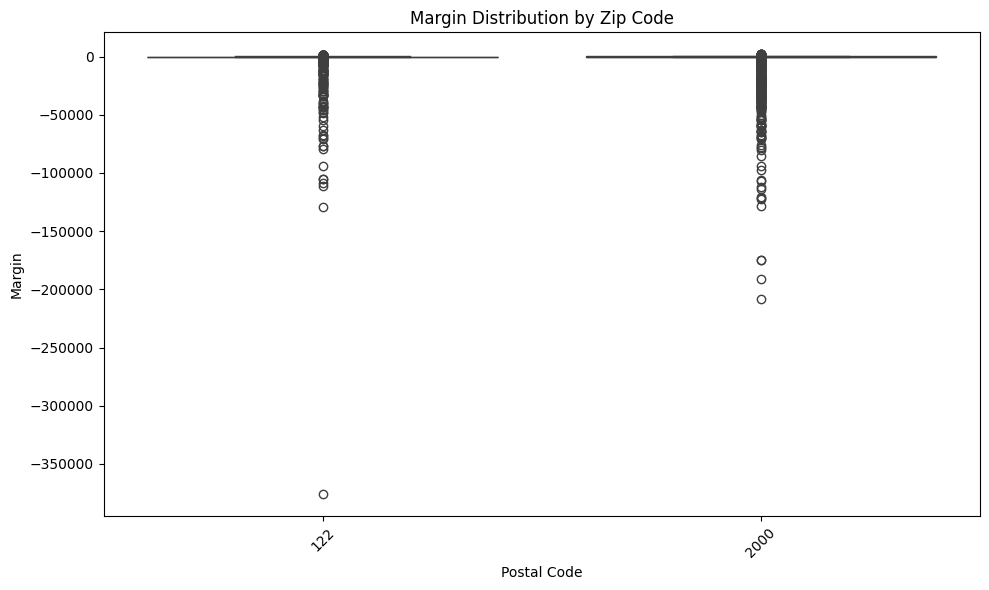

In [57]:
# Visualize Margin Distribution by Zip Code
plt.figure(figsize=(10, 6))
sns.boxplot(x='PostalCode', y='Margin', data=df[df['PostalCode'].isin(top_zips)])
plt.title('Margin Distribution by Zip Code')
plt.xlabel('Postal Code')
plt.ylabel('Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Hypothesis 4: Risk Difference Between Women and Men
#Assuming you have a column called Gender with "Male"/"Female"
male_group = df[df['Gender'] == 'Male']
female_group = df[df['Gender'] == 'Female']

# Chi-square for frequency
contingency = pd.crosstab(df['Gender'], df['HasClaim'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi-Square for Claim Frequency by Gender: p = {p:.4f}")

# t-test for claim severity
severity_m = male_group[male_group['HasClaim'] == 1]['TotalClaims']
severity_f = female_group[female_group['HasClaim'] == 1]['TotalClaims']
t_stat, p_val = ttest_ind(severity_m, severity_f, equal_var=False)
print(f"T-test for Claim Severity by Gender: p = {p_val:.4f}")


Chi-Square for Claim Frequency by Gender: p = 0.0303
T-test for Claim Severity by Gender: p = 0.5680
